#Import des librairies Python

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as stats

In [ ]:
from sklearn.preprocessing import scale 
from sklearn import linear_model, preprocessing
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf

# Import du fichier credit_immobilier_ISF

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving credit_immobilier_ISF.csv to credit_immobilier_ISF.csv


Import du fichier dans un data frame pandas

In [ ]:
import io
df = pd.read_csv(io.BytesIO(data_to_load['credit_immobilier_ISF.csv']))

# **1- ANALYSE DES DONNEES**

##Caractéristiques de base du fichier

In [ ]:
df.shape

(1021, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021 entries, 0 to 1020
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   compte_courant            1021 non-null   object 
 1   duree_emprunt_mois        1021 non-null   int64  
 2   historique_credit         1021 non-null   object 
 3   raison                    1021 non-null   object 
 4   montant                   1021 non-null   int64  
 5   compte_epargne            1020 non-null   object 
 6   duree_emploi              1021 non-null   object 
 7   annees_presence_logement  1018 non-null   float64
 8   age                       1020 non-null   float64
 9   autre_credit              1021 non-null   object 
 10  logement                  1021 non-null   object 
 11  nbre_emprunts_actuels     1021 non-null   int64  
 12  job                       1018 non-null   object 
 13  dependants                1021 non-null   object 
 14  telephon

On remarque qu'il y a 3 valeurs manquantes pour les colonnes annees_presence_logement et job et 1 valeur manquante pour les colonnes compte_epargne, age, defaillant.

In [ ]:
df.head()

,compte_courant,duree_emprunt_mois,historique_credit,raison,montant,compte_epargne,duree_emploi,annees_presence_logement,age,autre_credit,logement,nbre_emprunts_actuels,job,dependants,telephone,defaillant,revenufinal
0,< 0 Euro,6,critique,ameublement,1169,inconnu,> 7 annees,4.0,67.0,aucun,proprietaire,2,qualifie,1,oui,non,8135.110140
1,1 - 200 Euro,48,bon,ameublement,5951,< 100 Euro,1 - 4 annees,2.0,22.0,aucun,proprietaire,1,qualifie,1,oui,oui,19334.307686
2,inconnu,12,critique,education,2096,< 100 Euro,4 - 7 annees,3.0,49.0,aucun,proprietaire,1,non_qualifie,2,oui,non,4864.954258
3,< 0 Euro,42,bon,ameublement,7882,< 100 Euro,4 - 7 annees,4.0,45.0,aucun,autre,1,qualifie,2,oui,non,22152.947349
4,< 0 Euro,24,pauvre,auto,4870,< 100 Euro,1 - 4 annees,4.0,53.0,aucun,autre,2,qualifie,2,oui,oui,23900.704144


In [ ]:
df.tail()

,compte_courant,duree_emprunt_mois,historique_credit,raison,montant,compte_epargne,duree_emploi,annees_presence_logement,age,autre_credit,logement,nbre_emprunts_actuels,job,dependants,telephone,defaillant,revenufinal
1016,inconnu,45,critique,auto,4576,100 - 500 Euro,chomeur,4.0,27.0,aucun,proprietaire,1,qualifie,1,oui,non,17281.972830
1017,1 - 200 Euro,45,critique,auto,4576,100 - 500 Euro,chomeur,4.0,27.0,aucun,proprietaire,1,qualifie,1,oui,non,23544.389153
1018,inconnu,15,critique,auto,5045,inconnu,> 7 annees,4.0,59.0,aucun,proprietaire,1,qualifie,1,oui,non,6247.903416
1019,1 - 200 Euro,15,tres bon,auto,1234,100 - 500 Euro,1 - 4 annees,2.0,25.0,aucun,locataire,1,qualifie,1,oui,oui,3702.608164
1020,1 - 200 Euro,35,bon,auto,1734,100 - 500 Euro,1 - 4 annees,2.0,25.0,aucun,proprietaire,1,qualifie,1,oui,oui,9141.314880


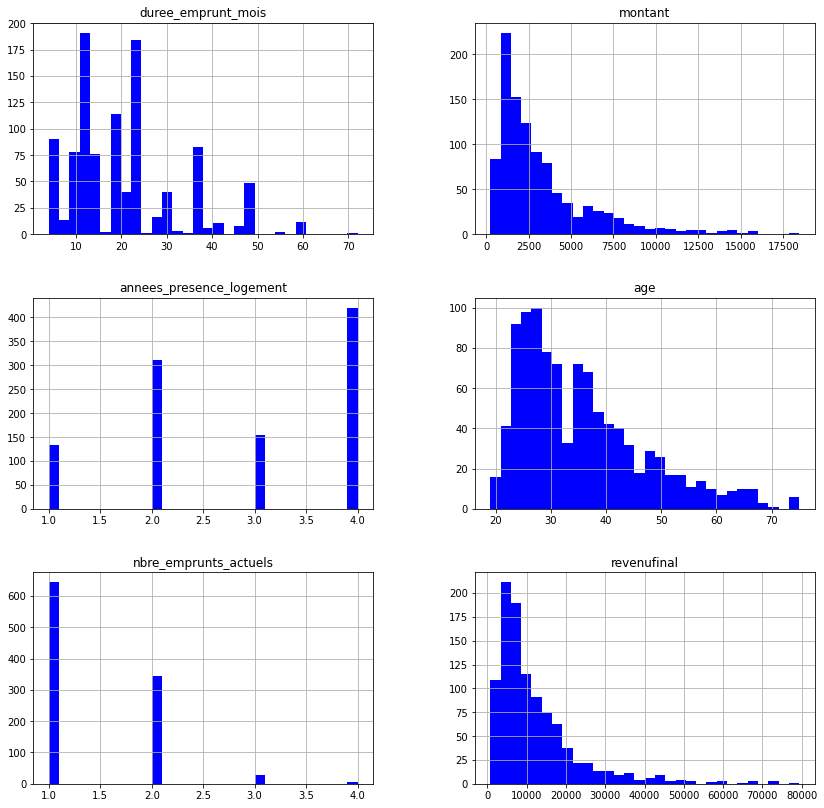

In [ ]:
# histogrammes variables numériques
df.hist(bins = 30, figsize = (14,14), color = 'b');

In [ ]:
echantillonColonnes = []
for i in df.columns:
    listcolumn = str(list(df[i].head(5)))
    echantillonColonnes.append(listcolumn)

In [ ]:
#data frame colonnes rassemblant les données précédentes pour vérification si anomalies fagrantes
d = {'colonne': list(df.columns), 'type': list(df.dtypes), 'Echantillon':echantillonColonnes}
colonnesTypes = pd.DataFrame(data=d)

pd.options.display.max_rows = 24
colonnesTypes

,colonne,type,Echantillon
0,compte_courant,object,"['< 0 Euro', '1 - 200 Euro', 'inconnu', '< 0 E..."
1,duree_emprunt_mois,int64,"[6, 48, 12, 42, 24]"
2,historique_credit,object,"['critique', 'bon', 'critique', 'bon', 'pauvre']"
3,raison,object,"['ameublement', 'ameublement', 'education', 'a..."
4,montant,int64,"[1169, 5951, 2096, 7882, 4870]"
5,compte_epargne,object,"['inconnu', '< 100 Euro', '< 100 Euro', '< 100..."
6,duree_emploi,object,"['> 7 annees', '1 - 4 annees', '4 - 7 annees',..."
7,annees_presence_logement,float64,"[4.0, 2.0, 3.0, 4.0, 4.0]"
8,age,float64,"[67.0, 22.0, 49.0, 45.0, 53.0]"
9,autre_credit,object,"['aucun', 'aucun', 'aucun', 'aucun', 'aucun']"


##Statistiques descriptives élémentaires

Indication sur les outliers

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
duree_emprunt_mois,1021.0,20.770813,12.050318,4.000000,12.000000,18.000000,24.000000,72.000000
montant,1021.0,3250.088149,2830.788792,250.000000,1352.000000,2299.000000,3966.000000,18424.000000
annees_presence_logement,1018.0,2.844794,1.104864,1.000000,2.000000,3.000000,4.000000,4.000000
age,1020.0,35.491176,11.395078,19.000000,27.000000,33.000000,42.000000,75.000000
nbre_emprunts_actuels,1021.0,1.409403,0.576390,1.000000,1.000000,1.000000,2.000000,4.000000
revenufinal,1021.0,12273.073874,11200.509536,734.476054,5192.478646,8615.582896,15559.590686,79354.527366


# **Traitement des données manquantes**

In [ ]:
df.isnull().sum()

compte_courant              0
duree_emprunt_mois          0
historique_credit           0
raison                      0
montant                     0
compte_epargne              1
duree_emploi                0
annees_presence_logement    3
age                         1
autre_credit                0
logement                    0
nbre_emprunts_actuels       0
job                         3
dependants                  0
telephone                   0
defaillant                  1
revenufinal                 0
dtype: int64

Lignes du data set pour lesquelles il y a des valeurs manquantes (NaN)

In [ ]:
mask = False
for col in df.columns : mask = mask | df[col].isnull()
dfnulls = df[mask]

dfnulls 

,compte_courant,duree_emprunt_mois,historique_credit,raison,montant,compte_epargne,duree_emploi,annees_presence_logement,age,autre_credit,logement,nbre_emprunts_actuels,job,dependants,telephone,defaillant,revenufinal
29,inconnu,7,critique,ameublement,1280,< 100 Euro,> 7 annes,NaN,NaN,2,qualifie,1,oui,oui,oui,NaN,6584.168778
413,inconnu,15,bon,auto,1430,500 - 1000 Euro,> 7 annees,NaN,31.0,aucun,proprietaire,2,qualifie,2,oui,non,6493.120171
458,inconnu,10,pauvre,business,2440,NaN,4 - 7 annees,1.0,29.0,aucun,proprietaire,2,qualifie,1,oui,oui,3604.960438
709,1 - 200 Euro,18,pauvre,auto,6300,< 100 Euro,> 7 annees,NaN,42.0,aucun,autre,1,qualifie,1,oui,oui,31068.029379
826,1 - 200 Euro,8,bon,business,907,< 100 Euro,< 1 annee,2.0,26.0,aucun,proprietaire,1,NaN,1,oui,non,3070.511597
853,inconnu,4,bon,ameublement,601,< 100 Euro,< 1 annee,3.0,23.0,aucun,locataire,1,NaN,2,oui,non,1056.317863
858,inconnu,18,bon,renonvations,1943,< 100 Euro,< 1 annee,4.0,23.0,aucun,proprietaire,1,NaN,1,oui,oui,9862.654808


Dans df_na uniquement les variables pour lesquelles il y a des valeurs manquantes 


In [ ]:
df_na = (df.isnull().sum() / len(df)) * 100
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)
missing_df = pd.DataFrame({'Ratio valeurs manquantes' : df_na})
missing_df

,Ratio valeurs manquantes
job,0.293830
annees_presence_logement,0.293830
defaillant,0.097943
age,0.097943
compte_epargne,0.097943


Aucune colonne a plus de 50% de données manquantes donc on ne retire pas de colonne.

**Données numériques on remplace par les valeurs médiannes : annees_presence_logement, age**

In [ ]:
print(df['annees_presence_logement'].median())

df['annees_presence_logement'] = df['annees_presence_logement'].fillna(df['annees_presence_logement'].median()) 



3.0


In [ ]:
print(df['age'].median())

df['age'] = df['age'].fillna(df['age'].median())

33.0


**Données catégorielles : job, defaillant, compte_epargne**

Pour la variable job on remplace les NA par la valeur en plus grand nombre, et le "Oui" on le met dans la classe de plus grand nombre aussi (car pas trop de sens )


In [ ]:
print(df['job'].value_counts())
# remplacement valeurs manquantes par le mode
df['job'].fillna('qualifie', inplace=True)
df['job']=df['job'].replace('oui', 'qualifie')

qualifie        648
non_qualifie    199
management      148
chomeur          22
oui               1
Name: job, dtype: int64


In [ ]:
print(df['defaillant'].value_counts())
# remplacement valeurs manquantes par le mode
df['defaillant'].fillna('non', inplace=True)

non    717
oui    303
Name: defaillant, dtype: int64


Défaillant - nombre de catégories : 2 - Pourcentage de la valeur non : 0.703232125367287


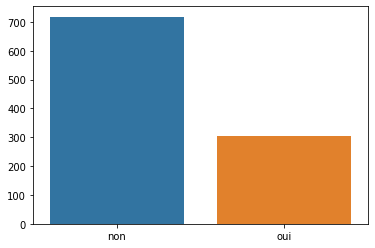

In [ ]:
# barplot pour variable nbre_portes
test = df.groupby(df['defaillant']).size().sort_values(ascending=False)
sns.barplot(x=list(test.index), y=list(test.iloc[0:]))
print('Défaillant' + ' - nombre de catégories : ' + str(len(test)) + ' - Pourcentage de la valeur non : ' + str(test[0]/len(df)))

In [ ]:
print(df['compte_epargne'].value_counts())
# remplacement valeurs manquantes par le mode
df['compte_epargne'].fillna('< 100 Euro', inplace=True)


< 100 Euro         611
inconnu            189
100 - 500 Euro     108
500 - 1000 Euro     64
> 1000 Euro         48
Name: compte_epargne, dtype: int64


In [ ]:
# vérification valeurs manquantes restantes après remplacement
df.isnull().sum()

compte_courant              0
duree_emprunt_mois          0
historique_credit           0
raison                      0
montant                     0
compte_epargne              0
duree_emploi                0
annees_presence_logement    0
age                         0
autre_credit                0
logement                    0
nbre_emprunts_actuels       0
job                         0
dependants                  0
telephone                   0
defaillant                  0
revenufinal                 0
dtype: int64

##**Traitement des outliers**

Les variables concernées 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


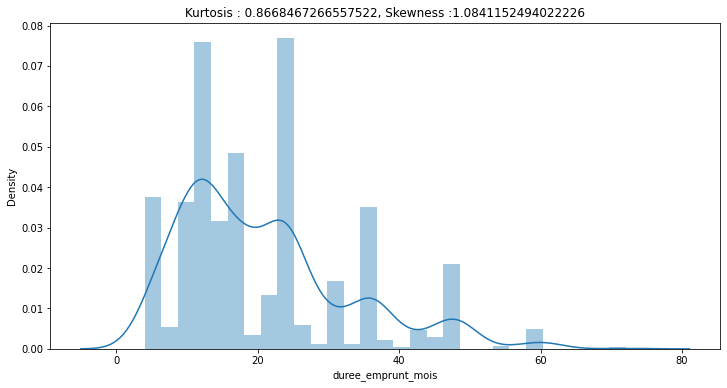

In [ ]:
# distribution de la variable duree_emprunt_mois et calculs kurtosis et skewness
plt.figure(figsize=(12,6))
sns.distplot(df['duree_emprunt_mois'].dropna())
plt.title('Kurtosis : ' +str(df['duree_emprunt_mois'].kurtosis())+ ', Skewness :' + str(df['duree_emprunt_mois'].skew()))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


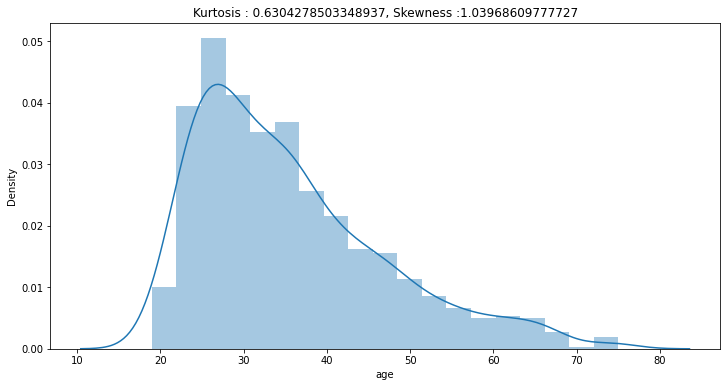

In [ ]:
# distribution de la variable age et calculs kurtosis et skewness
plt.figure(figsize=(12,6))
sns.distplot(df['age'].dropna())
plt.title('Kurtosis : ' +str(df['age'].kurtosis())+ ', Skewness :' + str(df['age'].skew()))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


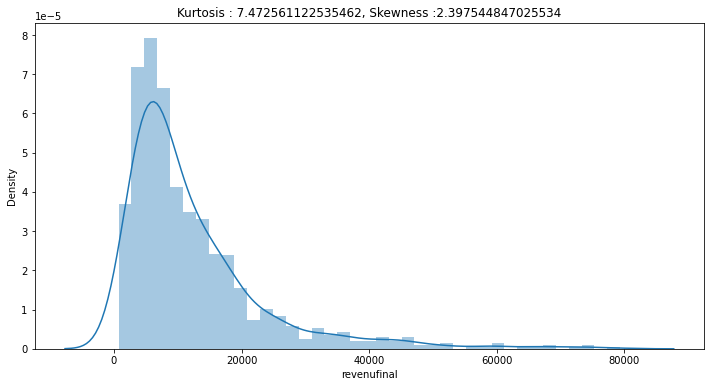

In [ ]:
# distribution de la variable revenufinal et calculs kurtosis et skewness
plt.figure(figsize=(12,6))
sns.distplot(df['revenufinal'].dropna())
plt.title('Kurtosis : ' +str(df['revenufinal'].kurtosis())+ ', Skewness :' + str(df['revenufinal'].skew()))
plt.show()

On ne remarque rien d'abérent pour les variables numériques. Pas de retraitement. 

##**Feature Engineering**

['compte_courant', 'historique_credit', 'raison', 'compte_epargne', 'duree_emploi', 'autre_credit', 'logement', 'job', 'dependants', 'telephone', 'defaillant']
compte_courant - nombre de catégories : 4 - Pourcentage de la valeur 1 : 0.39373163565132224
historique_credit - nombre de catégories : 5 - Pourcentage de la valeur 1 : 0.5239960822722821
raison - nombre de catégories : 6 - Pourcentage de la valeur 1 : 0.47600391772771794
compte_epargne - nombre de catégories : 5 - Pourcentage de la valeur 1 : 0.5994123408423114
duree_emploi - nombre de catégories : 6 - Pourcentage de la valeur 1 : 0.3418217433888345
autre_credit - nombre de catégories : 4 - Pourcentage de la valeur 1 : 0.8168462291870715
logement - nombre de catégories : 4 - Pourcentage de la valeur 1 : 0.7159647404505387
job - nombre de catégories : 4 - Pourcentage de la valeur 1 : 0.6385896180215475
dependants - nombre de catégories : 3 - Pourcentage de la valeur 1 : 0.8462291870714985
telephone - nombre de catégories : 1 - P

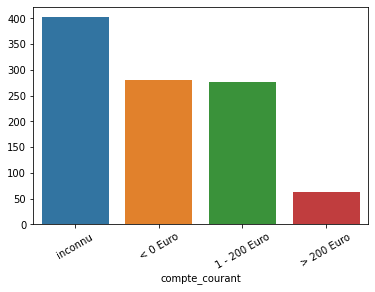

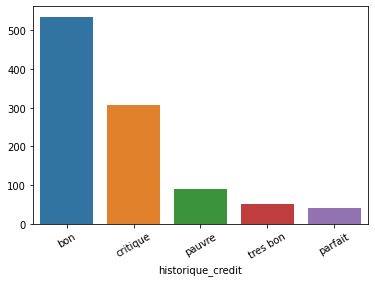

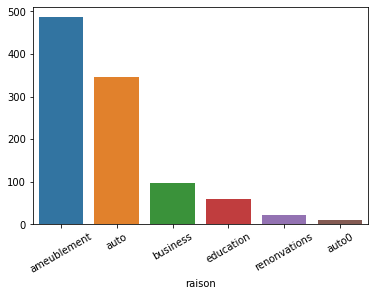

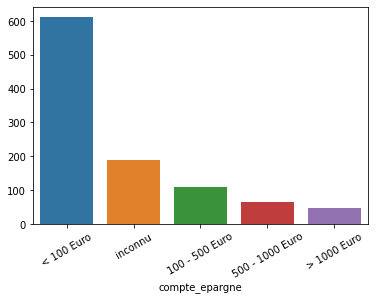

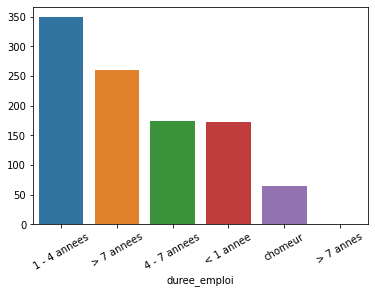

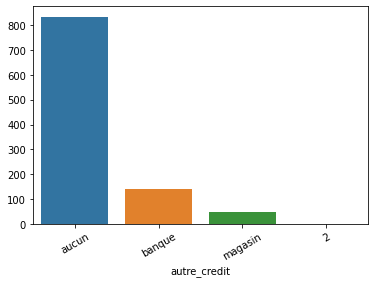

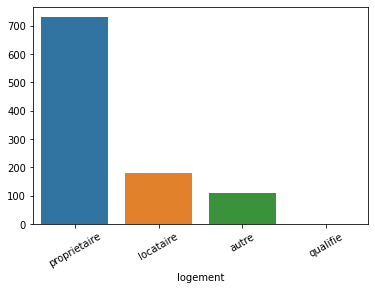

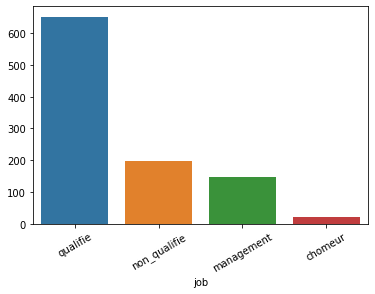

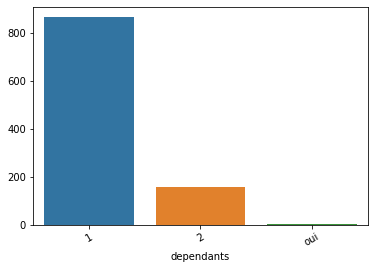

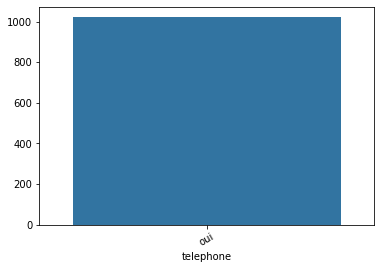

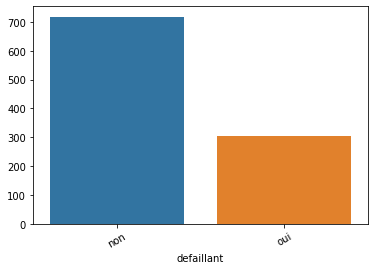

In [ ]:
# liste de toutes les variables catégorielles
allcatColumns = list(df.select_dtypes(include=['object']).columns)
print(allcatColumns)

#barplot pour variable 
def barplot(variable1):
  test = df.groupby(df[variable1]).size().sort_values(ascending=False)
  ax = sns.barplot(x=list(test.index), y=list(test.iloc[0:]))
  ax.set(xlabel=variable1)
  print(variable1 + ' - nombre de catégories : ' + str(len(test)) + ' - Pourcentage de la valeur 1 : ' + str(test[0]/len(df)))
  

#affiche les barplot pour chaque variable 
for var in allcatColumns:
  plt.figure()
  barplot(var)
  plt.xticks(rotation=30)

on peut supprimer la variable dépendant >80% et telephone 100%


In [ ]:
del df["dependants"]
del df["telephone"]

#**Corrélation**

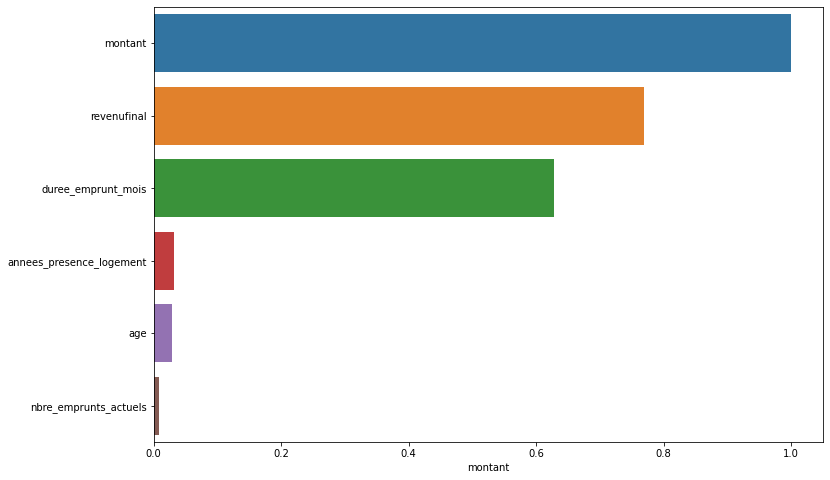

In [ ]:
df_corr = abs(df[['compte_courant', 'duree_emprunt_mois', 'historique_credit', 'raison', 'montant', 'compte_epargne', 'duree_emploi', 'annees_presence_logement', 'age','autre_credit','logement','nbre_emprunts_actuels','job',
                  'defaillant', 'revenufinal']].corr())
corrmontant = df_corr.sort_values('montant',ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=corrmontant['montant'], y=corrmontant.index)
plt.show()

In [ ]:
df_corr

,duree_emprunt_mois,montant,annees_presence_logement,age,nbre_emprunts_actuels,revenufinal
duree_emprunt_mois,1.000000,0.627381,0.036856,0.051613,0.025859,0.622605
montant,0.627381,1.000000,0.032648,0.028961,0.009092,0.768976
annees_presence_logement,0.036856,0.032648,1.000000,0.269731,0.079684,0.054859
age,0.051613,0.028961,0.269731,1.000000,0.142275,0.047864
nbre_emprunts_actuels,0.025859,0.009092,0.079684,0.142275,1.000000,0.011515
revenufinal,0.622605,0.768976,0.054859,0.047864,0.011515,1.000000


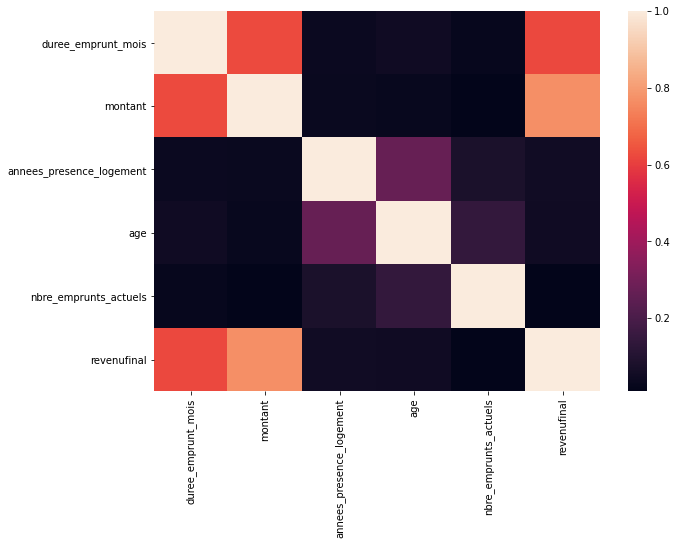

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(df_corr)
plt.show()

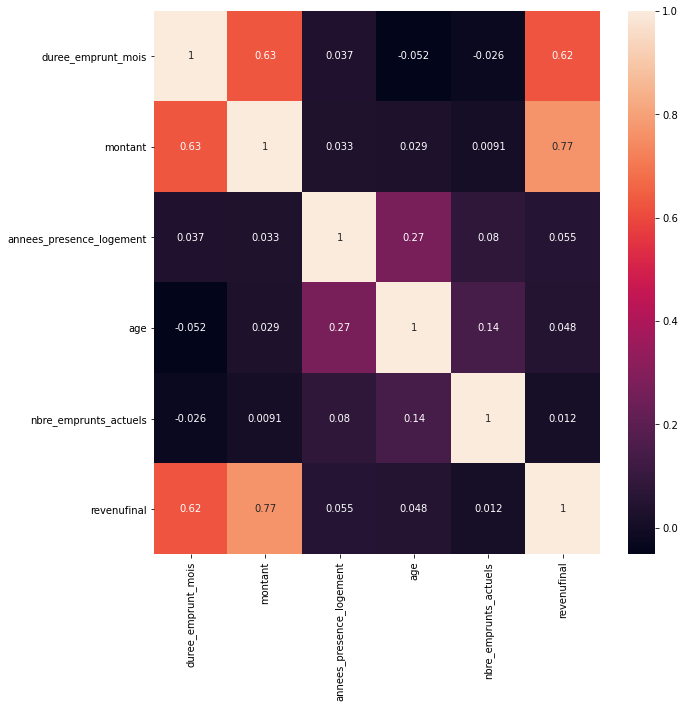

In [ ]:
correlations = df.corr()
f, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(correlations, annot = True);

On observe une corrélation plus importante entre : 
- le revenu final et le montant de l'emprunt 
- le montant et la durée de l'emprunt
- le revenu final et la durée de l'emprunt 

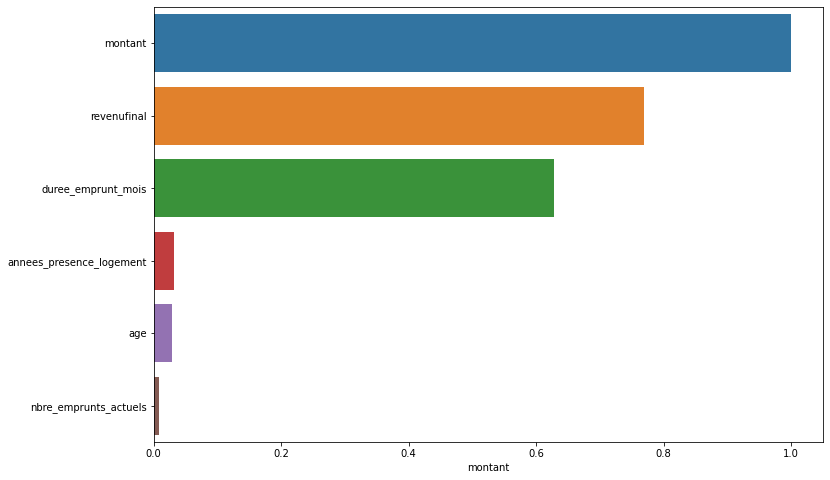

In [ ]:
# corrélation variables numériques avec le montant 
df_corr = abs(df[['compte_courant', 'duree_emprunt_mois', 'historique_credit', 'raison', 'montant', 'compte_epargne', 'duree_emploi', 'annees_presence_logement', 'age','autre_credit','logement','nbre_emprunts_actuels','job',
                  'defaillant', 'revenufinal']].corr())
corrprix = df_corr.sort_values('montant',ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=corrprix['montant'], y=corrprix.index)
plt.show()

In [ ]:
# Dummy variables
# Création de dummy variables pour les variables catégorielles One Hot Encoder 
df = pd.get_dummies(df, drop_first=True)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021 entries, 0 to 1020
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   duree_emprunt_mois              1021 non-null   int64  
 1   montant                         1021 non-null   int64  
 2   annees_presence_logement        1021 non-null   float64
 3   age                             1021 non-null   float64
 4   nbre_emprunts_actuels           1021 non-null   int64  
 5   revenufinal                     1021 non-null   float64
 6   compte_courant_< 0 Euro         1021 non-null   uint8  
 7   compte_courant_> 200 Euro       1021 non-null   uint8  
 8   compte_courant_inconnu          1021 non-null   uint8  
 9   historique_credit_critique      1021 non-null   uint8  
 10  historique_credit_parfait       1021 non-null   uint8  
 11  historique_credit_pauvre        1021 non-null   uint8  
 12  historique_credit_tres bon      10

,duree_emprunt_mois,montant,annees_presence_logement,age,nbre_emprunts_actuels,revenufinal,compte_courant_< 0 Euro,compte_courant_> 200 Euro,compte_courant_inconnu,historique_credit_critique,historique_credit_parfait,historique_credit_pauvre,historique_credit_tres bon,raison_auto,raison_auto0,raison_business,raison_education,raison_renonvations,compte_epargne_500 - 1000 Euro,compte_epargne_< 100 Euro,compte_epargne_> 1000 Euro,compte_epargne_inconnu,duree_emploi_4 - 7 annees,duree_emploi_< 1 annee,duree_emploi_> 7 annees,duree_emploi_> 7 annes,duree_emploi_chomeur,autre_credit_aucun,autre_credit_banque,autre_credit_magasin,logement_locataire,logement_proprietaire,logement_qualifie,job_management,job_non_qualifie,job_qualifie,defaillant_oui
0,6,1169,4.0,67.0,2,8135.110140,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
1,48,5951,2.0,22.0,1,19334.307686,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1
2,12,2096,3.0,49.0,1,4864.954258,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
3,42,7882,4.0,45.0,1,22152.947349,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,24,4870,4.0,53.0,2,23900.704144,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1


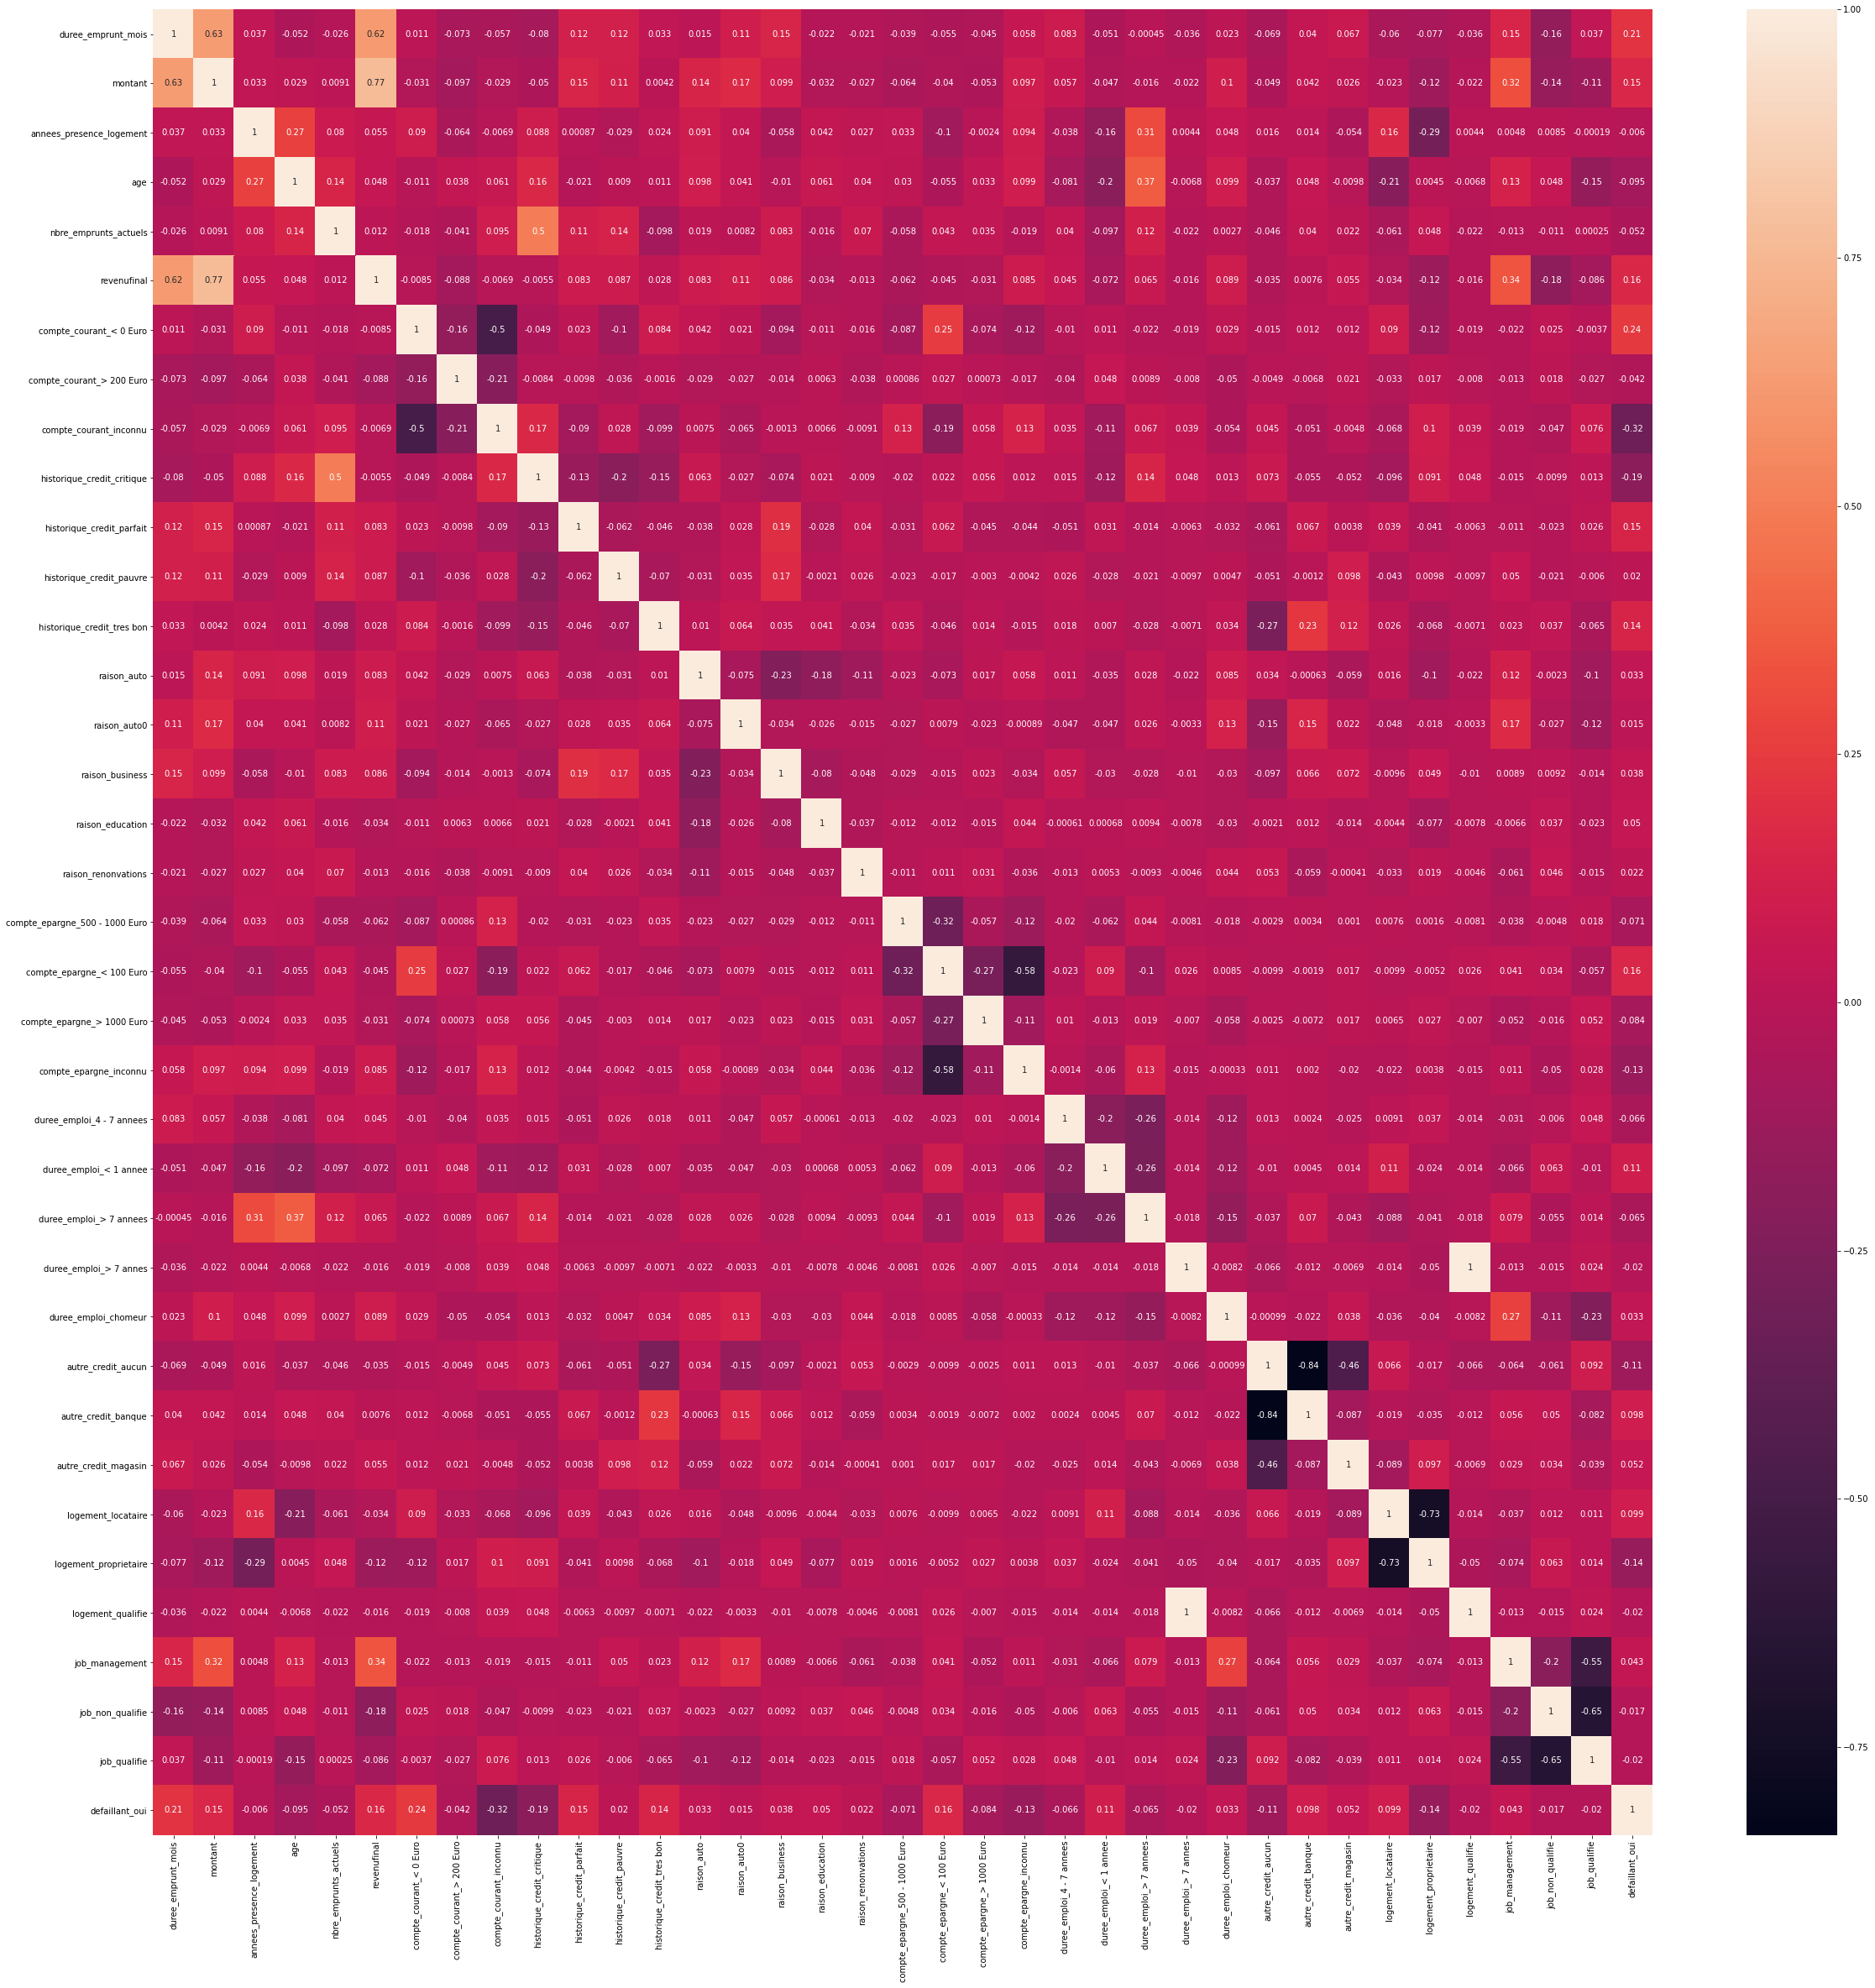

In [ ]:
allcatColumns2 = list(df.select_dtypes(include=['object']).columns)
df_corr2 = abs(df[allcatColumns2].corr())
correlations2 = df.corr()
f, ax = plt.subplots(figsize = (40, 40))
sns.heatmap(correlations2, annot = True);

#**2-MODELISATION : montant du prêt en fonction des features**

Séparation variables explicatives du montant 

In [ ]:
X = df.drop('montant', axis=1)
y = df['montant']

##**Phase 1 : Régression linéaire classique**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 52)

In [ ]:
lr=linear_model.LinearRegression()
lr.fit(X_train,y_train)
mse_test=mean_squared_error(y_test, lr.predict(X_test))
mse_train=mean_squared_error(y_train, lr.predict(X_train))

Calcul des résidus sur l'échantillon total

In [ ]:
# residuals=y-lr.predict(X)
myreg = LinearRegression()
myreg = myreg.fit(X,y)
residues = y-myreg.predict(X) # régression sklearn
fitted_values =  myreg.predict(X)

**Postulat 1: les résidus sont centrés**

Text(0, 0.5, 'Residual')

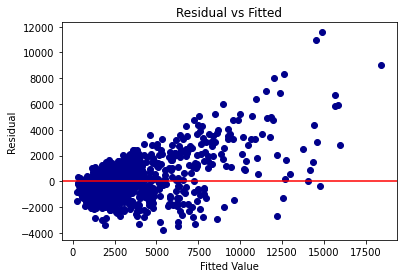

In [ ]:
plt.plot(y,residues, 'o', color='darkblue')
plt.title("Residual vs Fitted")
plt.xlabel("Fitted Value")
plt.axhline(y=0,color='red')
plt.ylabel("Residual")

**Postulat 2: les résidus sont non corrélés**

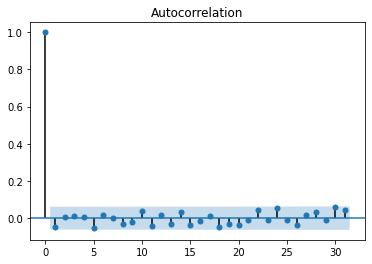

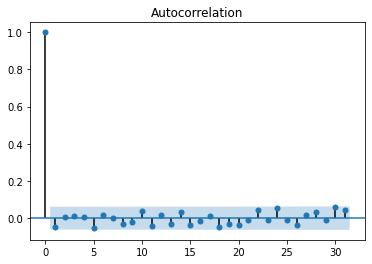

In [ ]:
plot_acf(residues)

**Postulat 3 ": Les erreurs sont gaussiennes**

2 méthodes graphiques : histogramme et QQ-plot

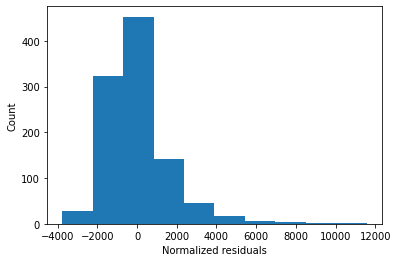

In [ ]:
plt.hist(residues)
plt.ylabel('Count')
plt.xlabel('Normalized residuals')
plt.show()

In [ ]:
residues_std = residues/np.sqrt(sum(residues**2)/(len(residues)-1))

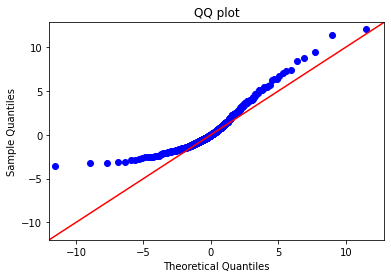

In [ ]:
fig = sm.qqplot(residues_std, stats.t, fit=True,line='45')
plt.title("QQ plot")
plt.show()

**Postulat 3: Les résidus sont homoscédastiques**

Fonction de lissage permettant d'obtenir une sortie graphique pour le postulat 3.

In [ ]:
def smooth(x,y, box_percent=0.05,res=50,median=True):
    surface = max(x)-min(x)
    my_pas = np.arange(min(x),max(x),surface/res)
    box = surface*box_percent
    demi_box = box/2
    y_sortie = np.array([])
    x_sortie = np.array([])
    for myx in my_pas :
        temp = [y[i] for i in range(len(x)) if ((x[i]>=(myx-demi_box))and(x[i]<=(myx+demi_box)))]
        if median==True :
            temp_y = np.median(temp)
        else :
            temp_y = np.mean(temp)
        #print(temp_y)
        y_sortie = np.append(y_sortie,temp_y)
        #print(y_sortie)
        x_sortie = np.append(x_sortie,myx)
    return x_sortie, y_sortie

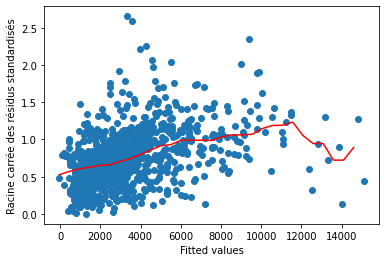

In [ ]:
sqrt_residues_std = np.sqrt(abs(residues_std)) # ne fonctionne pas si on ne met pas abs
fitted_values =  myreg.predict(X)

plt.scatter(fitted_values,sqrt_residues_std)
plt.xlabel("Fitted values")
plt.ylabel("Racine carrée des résidus standardisés")
# en reprenant la fonction smooth() plus haut
xs , ys = smooth(fitted_values,sqrt_residues_std,box_percent=0.25,res=30)
plt.plot(xs,ys,"-r")
plt.show()

On vérifie le postulat par la statistique de Durbin Watson. (ici elle est proche de 2 donc pas d'auto-corrélation linéaire).

In [ ]:
Xtilde=np.array(X)
# print(np.shape(Xtilde.T))
# print(np.shape(y))


def reg_m(y, x):
    ones = np.ones(len(x[0]))
    X = sm.add_constant(np.column_stack((x[0], ones)))
    for ele in x[1:]:
        X = sm.add_constant(np.column_stack((ele, X)))
    results = sm.OLS(y, X).fit()
    return results

print (reg_m(y, Xtilde.T).summary())

                            OLS Regression Results                            
Dep. Variable:                montant   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     57.12
Date:                Wed, 21 Apr 2021   Prob (F-statistic):          1.00e-206
Time:                        17:35:03   Log-Likelihood:                -9007.8
No. Observations:                1021   AIC:                         1.809e+04
Df Residuals:                     986   BIC:                         1.826e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -62.9766    130.568     -0.482      0.6

On obtient la mean squared error :

In [ ]:
print("MSE TRAIN : ", mse_train)
print("\nMSE TEST : ", mse_test)

MSE TRAIN :  2459673.3377325693

MSE TEST :  3474549.488957912


In [ ]:
# rmse
rmse_test = np.sqrt(mse_test)
print("RMSE test set: ", rmse_test)

RMSE test set:  1864.0143478412156


On obtient le R2 score et R2 score ajusted

In [ ]:
# score R2 sur le train data set

r2_train=r2_score(y_train, lr.predict(X_train))
r2_train_ajusted= 1 - (1-r2_train)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("r2 score train set :", r2_train)
print("r2 ajusted score train set :", r2_train_ajusted)

# score R2 sur le test data set
r2_test=r2_score(y_test, lr.predict(X_test))
r2_test_ajusted= 1 - (1-r2_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("r2 score test set :",r2_test)
print("r2 ajusted score test set :", r2_test_ajusted)

r2 score train set : 0.6690994500706475
r2 ajusted score train set : 0.6515035567213763
r2 score test set : 0.6242411218892256
r2 ajusted score test set : 0.5741399381411224


D'après ces résultats, on peut voir que le R2 score est meilleur sur le train que sur le test, ce qui est normal. De même pour la mean squared error qui est plus faible sur le train set que sur le test. 

##**Phase 2 : Régression Ridge**


In [ ]:
# mise à l'échelle
# fit sur le train data set
scaler = preprocessing.StandardScaler().fit(X_train)

In [ ]:
# transform sur le train data set
X_train_s = scaler.transform(X_train)

In [ ]:
# transform sur le test data set
X_test_s = scaler.transform(X_test)

In [ ]:
# regression ridge
# définition d'une plage de valeurs alpha à tester
n_alphas = 300
alphas = np.logspace(-5, 10, n_alphas)

In [ ]:
# test avec les différentes valeurs de alpha
ridge = linear_model.Ridge()

coefs = []
errors = []
errorstrain = []
r2 = []
r2train = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train_s, y_train)
    coefs.append(ridge.coef_)
    errors.append([mse_test, np.mean((ridge.predict(X_test_s) - y_test) ** 2)])
    errorstrain.append([mse_train, np.mean((ridge.predict(X_train_s) - y_train) ** 2)]) 
    r2.append(r2_score(y_test, ridge.predict(X_test_s)))
    r2train.append(r2_score(y_train, ridge.predict(X_train_s)))

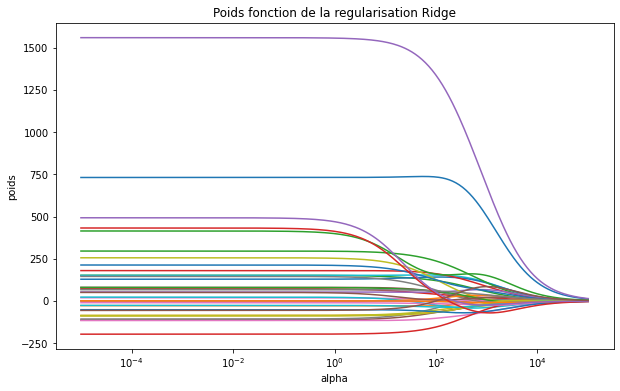

In [ ]:
# affichage evolution de la valeur des poids 
plt.figure(figsize=(10,6))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('poids')
plt.title('Poids fonction de la regularisation Ridge')
#plt.axis('tight')
plt.show()

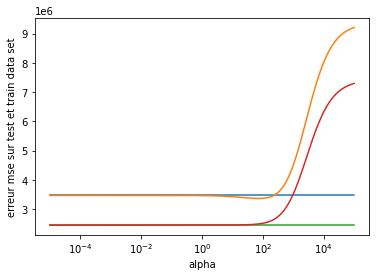

In [ ]:
#Evolution de la MSE en fonction de alpha 
ax = plt.gca()

ax.plot(alphas, errors)
ax.plot(alphas, errorstrain)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('erreur mse sur test et train data set')
plt.axis('tight')
plt.show()

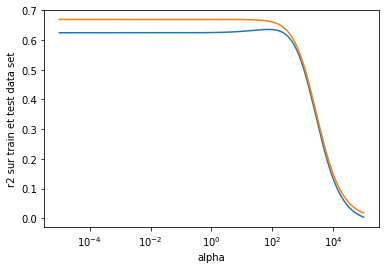

In [ ]:
#Evolution du R2 en fonction de alpha
ax = plt.gca()

ax.plot(alphas, r2)
ax.plot(alphas, r2train)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('r2 sur train et test data set')
plt.axis('tight')
plt.show()

In [ ]:
# R2 sur train set
print("Max R2 train set : ", max(r2train)) 
#R2 sur test set 
print("Max R2 test set : ", max(r2))

Max R2 train set :  0.669099450070647
Max R2 test set :  0.6355298597734591


###**Ridge Cross Validation**

In [ ]:
#La plage de valeurs de alpha à tester 
n_alphas = 300
my_alphas = np.logspace(-5, 20, n_alphas)

In [ ]:
ridgecv = RidgeCV(alphas = my_alphas, scoring = 'neg_mean_squared_error', normalize = True,cv=3)
ridgecv.fit(X, y)

RidgeCV(alphas=array([1.00000000e-05, 1.21230540e-05, 1.46968439e-05, 1.78170632e-05,
       2.15997219e-05, 2.61854596e-05, 3.17447741e-05, 3.84843611e-05,
       4.66547988e-05, 5.65598646e-05, 6.85678294e-05, 8.31251499e-05,
       1.00773068e-04, 1.22167735e-04, 1.48104605e-04, 1.79548012e-04,
       2.17667025e-04, 2.63878910e-04, 3.19901828e-04, 3.87818715e-04,
       4.70154722e-04, 5.69971109e-0...
       5.56954091e+18, 6.75198452e+18, 8.18546731e+18, 9.92328623e+18,
       1.20300535e+19, 1.45840988e+19, 1.76803818e+19, 2.14340223e+19,
       2.59845810e+19, 3.15012480e+19, 3.81891330e+19, 4.62968923e+19,
       5.61259726e+19, 6.80418197e+19, 8.24874655e+19, 1.00000000e+20]),
        cv=3, fit_intercept=True, gcv_mode=None, normalize=True,
        scoring='neg_mean_squared_error', store_cv_values=False)

In [ ]:
# best alpha
print("The best alpha value is : ", ridgecv.alpha_)

The best alpha value is :  0.08506793416364153


In [ ]:
# Ridge avec le meilleur alpha
ridge_best = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge_best.fit(X_train_s, y_train)
print("mse sur test data set : ")
print(mean_squared_error(y_test, ridge_best.predict(X_test_s)))

mse sur test data set : 
3371722.5680412175


In [ ]:
rmse_test = np.sqrt(mean_squared_error(y_test, ridge_best.predict(X_test_s)))

print("The RMSE on the test set :", rmse_test)
print("The R2 Score on the test set : ", r2_score(y_test, ridge_best.predict(X_test_s)))


The RMSE on the test set : 1836.225086431731
The R2 Score on the test set :  0.635361449449974


Retrouver le poids des features avec le alpha optimal

In [ ]:
ridge_best.fit(X, y)
pd.Series(ridge_best.coef_, index = X.columns)

duree_emprunt_mois           57.744127
annees_presence_logement    -20.722832
age                           4.059020
nbre_emprunts_actuels        30.508448
revenufinal                   0.131217
                               ...    
logement_qualifie           -88.798521
job_management              476.852742
job_non_qualifie            -21.261370
job_qualifie               -107.200130
defaillant_oui               -6.264247
Length: 36, dtype: float64

##**Phase 3 : Régression Lasso**

On teste avec une plage de valeurs l'hyperparamètre Lasso

In [ ]:
#application du Lasso
# test alpha sur une plage de valeurs
n_alphas = 300
alphas = np.logspace(-5, 5, n_alphas)
lasso = linear_model.Lasso(fit_intercept=False)

coefs = []
errors = []
errorst = []
r2 = []
r2train = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    errors.append([mse_test, np.mean((lasso.predict(X_test) - y_test) ** 2)])
    errorst.append([mse_train, np.mean((lasso.predict(X_train) - y_train) ** 2)])
    r2.append(r2_score(y_test, lasso.predict(X_test)))
    r2train.append(r2_score(y_train, lasso.predict(X_train)))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 877940536.7522806, tolerance: 1235799.0788
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 877927502.4733247, tolerance: 1235799.0788
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 877913425.0623343, tolerance: 1235799.0788
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 877898221.0877981, toleranc

Evolution des poids en fonction de alpha

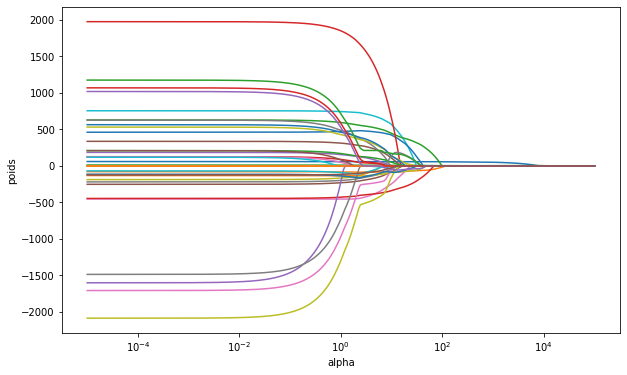

In [ ]:
# visualisation évolution des poids en fonction de alpha
plt.figure(figsize=(10,6))
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('poids')
plt.axis('tight')
plt.show()

Par rapport à Ridge, Lasso supprime des variables en mettant leur poids à zéro.

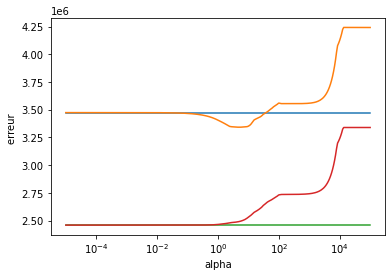

In [ ]:
#Evolution MSE En fonction de alpha
ax = plt.gca()

ax.plot(alphas, errors)
ax.plot(alphas, errorst)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('erreur ')
plt.axis('tight')
plt.show()

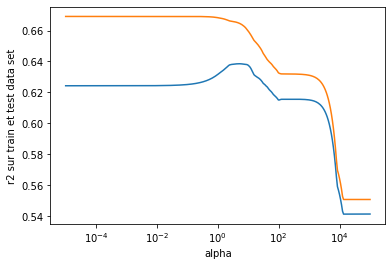

In [ ]:
#Evolution du R2 en fonction de alpha
ax = plt.gca()

ax.plot(alphas, r2)
ax.plot(alphas, r2train)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('r2 sur train et test data set')
plt.axis('tight')
plt.show()

###**Lasso Cross Validation**

In [ ]:
# definition plage de valeurs
n_alphas = 300
my_alphas = np.logspace(-2, 3, n_alphas)

In [ ]:
# outil pour la détection de la solution la plus performante en validation croisée
# random_state = 0 pour fixer l’initialisation du générateur de nombre aléatoire
# cv = 5 pour 5-fold validation croisée
lcv = LassoCV(alphas=my_alphas,normalize=False,fit_intercept=False,random_state=0,cv=5)
# lancement sur l'échantillon d'apprentissage
lcv.fit(X_train, y_train)

LassoCV(alphas=array([1.00000000e-02, 1.03925568e-02, 1.08005237e-02, 1.12245057e-02,
       1.16651313e-02, 1.21230540e-02, 1.25989528e-02, 1.30935333e-02,
       1.36075289e-02, 1.41417017e-02, 1.46968439e-02, 1.52737785e-02,
       1.58733611e-02, 1.64964807e-02, 1.71440614e-02, 1.78170632e-02,
       1.85164842e-02, 1.92433614e-02, 1.99987727e-02, 2.07838382e-02,
       2.15997219e-02, 2.24476338e-0...
       6.54716840e+02, 6.80418197e+02, 7.07128478e+02, 7.34887289e+02,
       7.63735792e+02, 7.93716762e+02, 8.24874655e+02, 8.57255673e+02,
       8.90907830e+02, 9.25881025e+02, 9.62227117e+02, 1.00000000e+03]),
        copy_X=True, cv=5, eps=0.001, fit_intercept=False, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=0, selection='cyclic', tol=0.0001,
        verbose=False)

In [ ]:
#valeurs des MSE en validation croisée
print("MSE validation croisée : ", lcv.mse_path_)

MSE validation croisée :  [[2550663.79301637 2105298.82026445 3389558.98673748 3973774.76636447
  1869789.39882962]
 [2549026.94259529 2106010.88492179 3389691.25550957 3972977.23733987
  1869019.99651345]
 [2547334.62915984 2106747.21167682 3389979.50720317 3972067.76756319
  1868287.82620062]
 ...
 [2635390.01674402 1933933.88557225 3321341.81370943 4264173.65440214
  1773781.91721945]
 [2635406.13355632 1933925.80540323 3321339.00072073 4264174.03331808
  1773783.61790973]
 [2635421.64393318 1933918.03203358 3321336.29632394 4264174.40016729
  1773785.25682694]]


In [ ]:
#moyenne des MSE en validation croisée pour chaque alpha
avg_mse = np.mean(lcv.mse_path_,axis=1)
#alphas vs. MSE en cross-validation
print(pd.DataFrame({'alpha':lcv.alphas_,'MSE':avg_mse})) 

           alpha           MSE
0    1000.000000  2.777817e+06
1     962.227117  2.777345e+06
2     925.881025  2.776883e+06
3     890.907830  2.776452e+06
4     857.255673  2.776058e+06
..           ...           ...
295     0.011665  2.785721e+06
296     0.011225  2.785723e+06
297     0.010801  2.785724e+06
298     0.010393  2.785726e+06
299     0.010000  2.785727e+06

[300 rows x 2 columns]


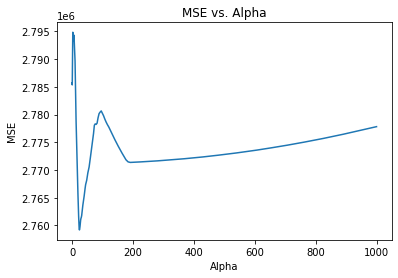

In [ ]:
#Evolution MSE en fonction de alpha
plt.plot(lcv.alphas_,avg_mse)
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE vs. Alpha')
plt.show()

In [ ]:
#best alpha
print("The best alpha value is : ", lcv.alpha_) 

The best alpha value is :  23.87406771860647


In [ ]:
lasso = linear_model.Lasso(fit_intercept=False)
lasso.set_params(alpha= lcv.alpha_)
lasso.fit(X_train, y_train)
mse_t = mean_squared_error(y_test, lasso.predict(X_test))
print('The mean squared error sur le test data set est :', mse_t)
rmse_test = np.sqrt(mean_squared_error(y_test, lasso.predict(X_test)))
print("\nTHE RMSE on the test set is : ", rmse_test)
print("The R2 Score on the test set : ", r2_score(y_test, lasso.predict(X_test)))  


The mean squared error sur le test data set est : 3434237.6319357776

THE RMSE on the test set is :  1853.1696176917476
The R2 Score on the test set :  0.6286006908685532


poids des variables explicatives avec Lasso  

In [ ]:
# certaines variables peuvente etre éliminées avec un poids à zéro
pd.Series(lasso.coef_, index=X.columns)

duree_emprunt_mois           59.017951
annees_presence_logement    -69.120805
age                           8.244728
nbre_emprunts_actuels         0.000000
revenufinal                   0.151086
                               ...    
logement_qualifie            -0.000000
job_management              105.660535
job_non_qualifie              0.000000
job_qualifie                -41.924907
defaillant_oui               -0.000000
Length: 36, dtype: float64

Text(0.5, 1.0, 'Importance des Features')

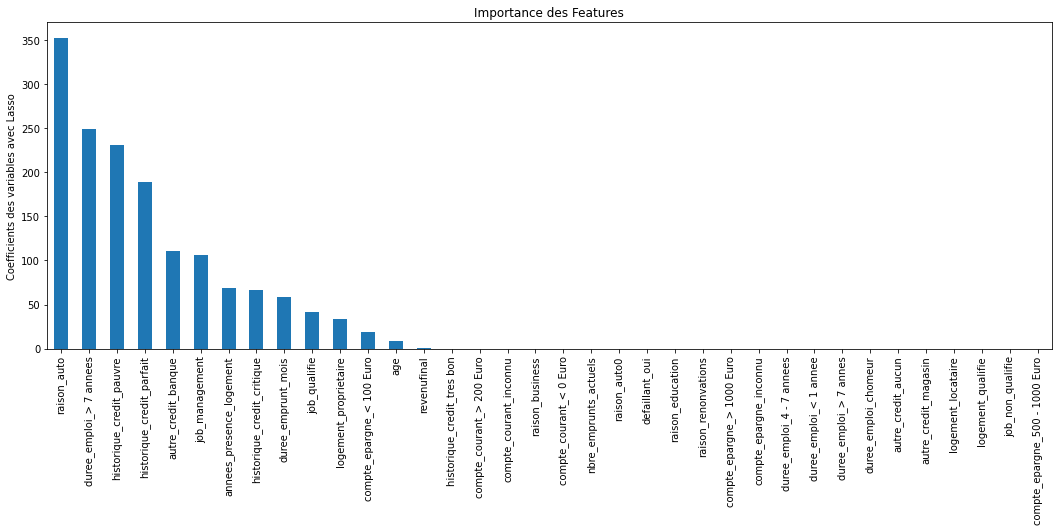

In [ ]:
# feature importance

importance = pd.Series(np.abs(lasso.coef_.ravel()))
importance.index = X.columns
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))
plt.ylabel('Coefficients des variables avec Lasso')
plt.title('Importance des Features')